# Van's Matplotlib Basics

In [37]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Creating a Basic Line Plot:

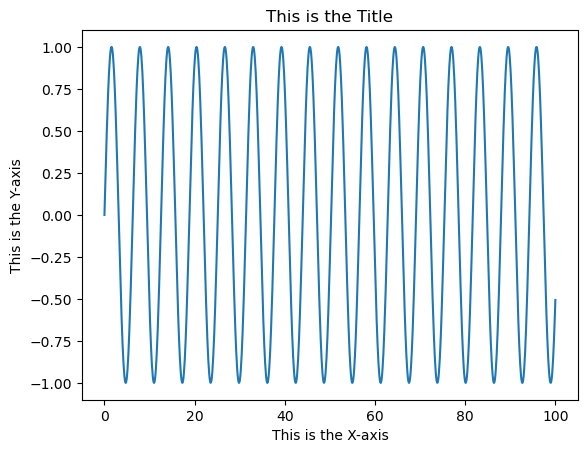

In [2]:
# Generating fake data
x = np.linspace(0, 100, 1000) # this creates 100 points b/w 0 and 100
y = np.sin(x) # y = sin(x)

# Creating the plot
plt.plot(x, y)

# Adding labels and titles
plt.xlabel("This is the X-axis")
plt.ylabel("This is the Y-axis")
plt.title("This is the Title")
plt.show() # need this to display the graph (in notebooks, the graph will still show up even without it)

Other than `plt.plot()`, there are various other types of graphs you can make (histograms, scatterplots, bargraphs, violin/box plots etc.). You can look at the [matplotlib documentation](https://matplotlib.org/stable/api/pyplot_summary.html) to find what suits your needs! Some of the most common ones you might use include...
* `plt.scatter()` - scatter plot
* `plt.bar()` or `plt.barh()` - bar graph and horizontal bar graph
* `plt.hist()` - histogram
* `plt.boxplot()` or `plt.violinplot()` - box plots and violin plots

### There are multiple ways to customize your plots!
Some of the most common ones include the `color` (default is usually "tab:blue"), the `linestyle`, and the `linewidth`. For the text, you can also customize things such as the fontsize and font. The best way to find out which is to explore the documentation.

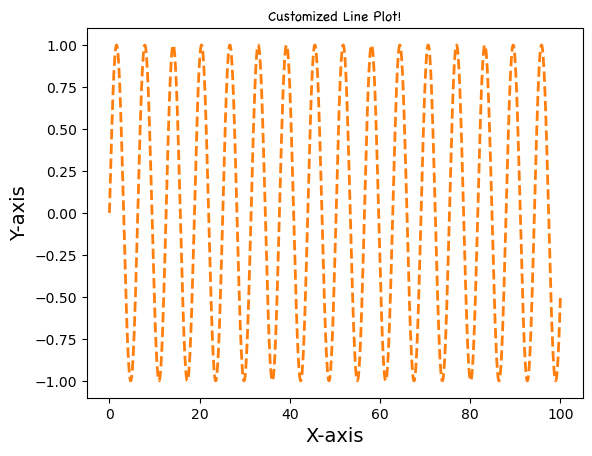

In [3]:
plt.plot(x, y, color='tab:orange', linestyle='--', linewidth=2) # this will make the line blue, dashed lines with thickness of 2
plt.xlabel("X-axis", fontsize=14) # changing font size to 14
plt.ylabel("Y-axis", fontsize=14)
plt.title("Customized Line Plot!", font='chalkboard') # changing font to chalkboard
plt.show()

### Adding a legend can make the graph more informative

### Creating multiple subplots with `plt.subplot()`

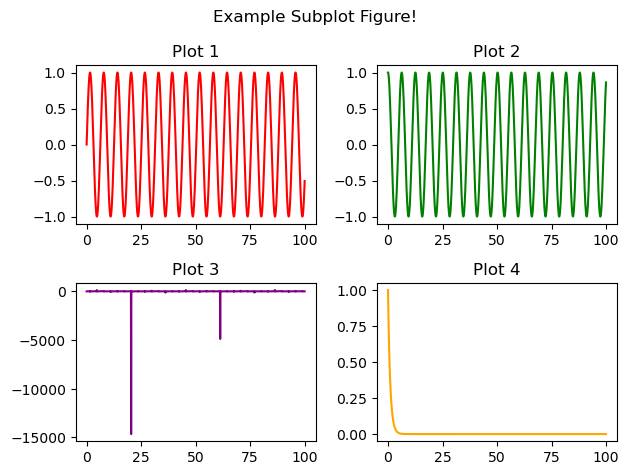

In [5]:
# This creates a 2x2 grid of subplots (2 rows, 2 columns)

# The first subplot
plt.subplot(2, 2, 1)
plt.plot(x, y, color='red')
plt.title("Plot 1")

# The second subplot
plt.subplot(2, 2, 2)
plt.plot(x, np.cos(x), color='green')
plt.title("Plot 2")

# The third subplot
plt.subplot(2, 2, 3)
plt.plot(x, np.tan(x), color='purple')
plt.title("Plot 3")

# The fourth subplot
plt.subplot(2, 2, 4) 
plt.plot(x, np.exp(-x), color='orange')
plt.title("Plot 4")

plt.suptitle('Example Subplot Figure!')

plt.tight_layout()  # This automatically adjusts the subplot spacing
plt.show()


### Creating multiple subplots with `plt.subplots()` (more advanced/better)
Instead of manually calling plt.subplot(), you can use `plt.subplots()` to create subplots in a more flexible and readable way. This is the better option most of the time.

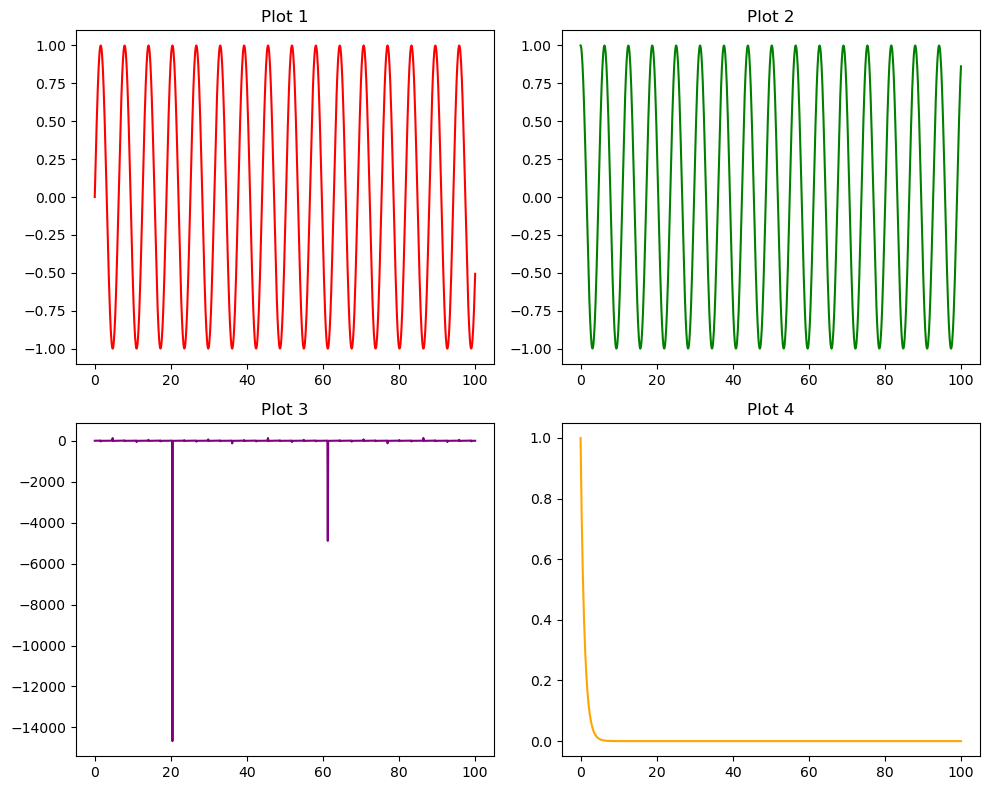

In [6]:
# Create a 2x2 grid of subplots, returning a figure and axes array
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) # adjusting figsize!

# Plot on each subplot
axs[0, 0].plot(x, y, color='red')
axs[0, 0].set_title("Plot 1")

axs[0, 1].plot(x, np.cos(x), color='green')
axs[0, 1].set_title("Plot 2")

axs[1, 0].plot(x, np.tan(x), color='purple')
axs[1, 0].set_title("Plot 3")

axs[1, 1].plot(x, np.exp(-x), color='orange')
axs[1, 1].set_title("Plot 4")

# Adjust layout
plt.tight_layout()
plt.show()


* `fig, axs = plt.subplots(2, 2)` creates a 2x2 grid of subplots and returns the figure object (`fig`) and an array of axes (`axs`). Keep in mind that you don't necessarily have to use these variables.
* `axs[row, col]` is used to access the individual subplots.

In [9]:
# You can also customize each subplot individually...
axs[0, 0].set_xlabel("X-axis")
axs[0, 0].set_ylabel("Y-axis")
axs[1, 1].set_title("Customized Plot")

# ...or set grid for all subplots
for ax in axs.flat: # this flattens the 2D array of axes into a 1D array, letting you iterate over all subplots.
    ax.grid(True)

And once you're done with your plot, you can save it with the `savefig()` function!

In [ ]:
# Save the current figure as a PNG image in the figs directory with resolution (dpi) of 300.
# dpi is completely optional. Most of the time, I don't use it.
plt.savefig('figs/example_plot.png', dpi=300)

### Creating a simple scatter plot with a legend

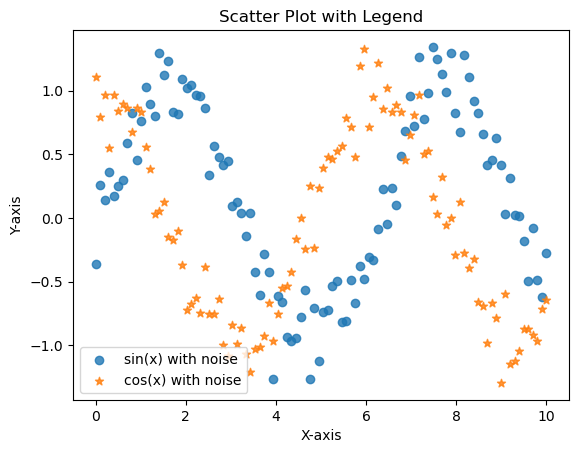

In [10]:
# Generating data
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + np.random.normal(0, 0.2, size=x.shape)  # adding some extra noise
y2 = np.cos(x) + np.random.normal(0, 0.2, size=x.shape)

# Creating the scatter plots
plt.scatter(x, y1, label='sin(x) with noise', color='tab:blue', marker='o', alpha=0.8) # alpha is the opacity
plt.scatter(x, y2, label='cos(x) with noise', color='tab:orange', marker='*', alpha=0.8)

# Add title and labels
plt.title('Scatter Plot with Legend')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.legend() # adding the legend
plt.show()


* The legend is created based on the `label` argument from the scatter plot (for example, `"sin(x) with noise"`)

### Legend customization
On top of the plots, there are also multiple ways to customize your legends.

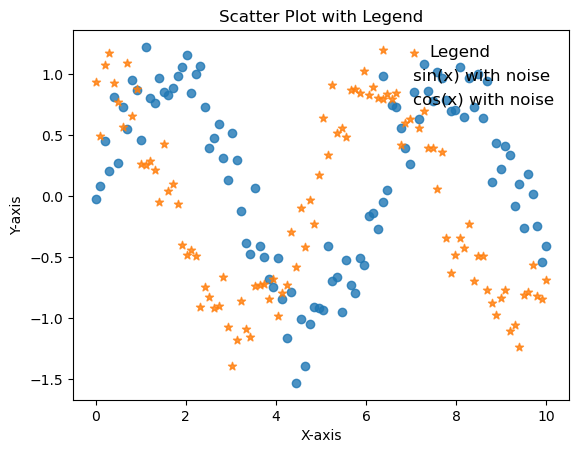

In [12]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + np.random.normal(0, 0.2, size=x.shape)  # adding some extra noise
y2 = np.cos(x) + np.random.normal(0, 0.2, size=x.shape)
plt.scatter(x, y1, label='sin(x) with noise', color='tab:blue', marker='o', alpha=0.8) # alpha is the opacity
plt.scatter(x, y2, label='cos(x) with noise', color='tab:orange', marker='*', alpha=0.8)
plt.title('Scatter Plot with Legend')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# This extra code puts the legend in the "upper right" (default is "best")
# It also customizes the fontsize, title, title fontsize, and removes the background frame
plt.legend(loc='upper right', fontsize=12, title='Legend', title_fontsize='large', frameon=False)
plt.show()

### Multiple legends
You might have multiple series in a scatter plot, and you might want to control which legend entries appear. For example, you might want to create a global legend or exclude certain series from the legend. In the example below, we are storing the scatter plot objects (`scatter1` and `scatter2`) and passing them directly to the `plt.legend()` function. This allows for more control over which elements appear in the legend.

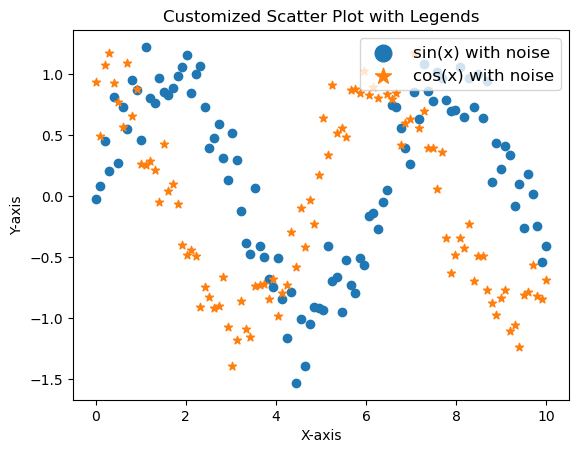

In [16]:
# Create scatter plots
scatter1 = plt.scatter(x, y1, label='sin(x) with noise', color='tab:blue', marker='o')
scatter2 = plt.scatter(x, y2, label='cos(x) with noise', color='tab:orange', marker='*')

# Add legend with customized markerscale and font size
plt.legend(loc='upper right', markerscale=2, fontsize=12)

# Show the plot
plt.title('Customized Scatter Plot with Legends')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


### Colormaps!
If you want to plot a scatter plot with a color map and legend that reflects the color of the points, you can do so using `c` to represent color values. Matplotlib has multiple color map options that you can look through. 'viridis' is a commonly used cmap.

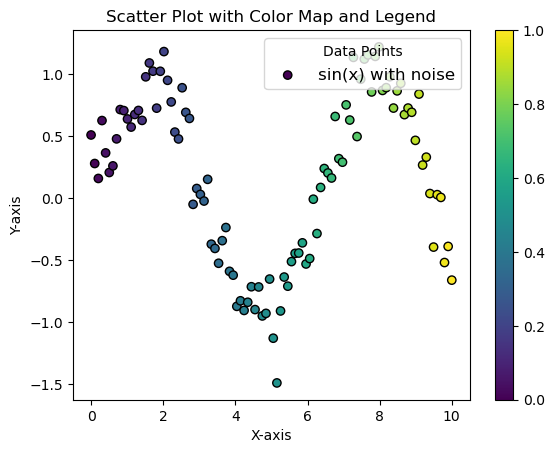

In [17]:
# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, size=x.shape)
colors = np.linspace(0, 1, 100)  # Color mapping from 0 to 1

# Scatter plot with color mapping
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='sin(x) with noise', edgecolors='k')

# Add colorbar and legend
plt.colorbar(scatter)  # Adds color bar to the plot
plt.legend(loc='upper right', fontsize=12, title='Data Points')

# Title and labels
plt.title('Scatter Plot with Color Map and Legend')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()

### Multiple subplots and legends
You can also use scatter plots in multiple subplots and add legends individually to each of your subplots. In the below example, each subplot has its own legend, and you can control where the legend is placed for each individual plot.

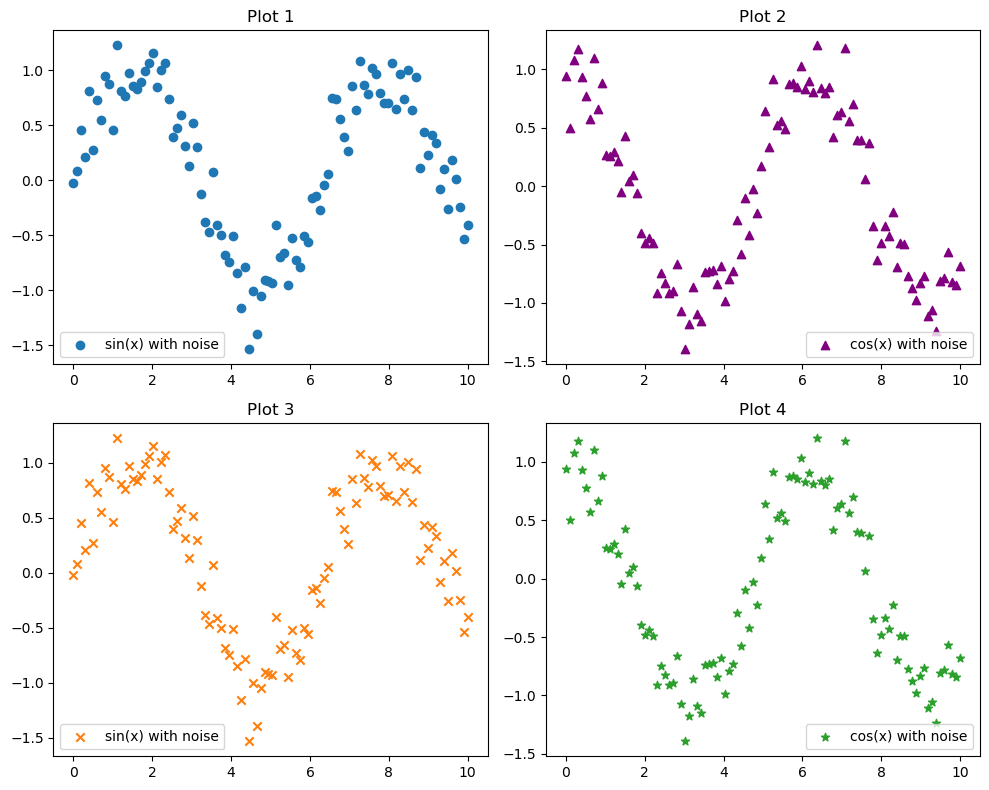

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# First subplot
axs[0, 0].scatter(x, y1, label='sin(x) with noise', color='tab:blue', marker='o')
axs[0, 0].set_title('Plot 1')
axs[0, 0].legend()

# Second subplot
axs[0, 1].scatter(x, y2, label='cos(x) with noise', color='purple', marker='^')
axs[0, 1].set_title('Plot 2')
axs[0, 1].legend()

# Third subplot
axs[1, 0].scatter(x, y1, label='sin(x) with noise', color='tab:orange', marker='x')
axs[1, 0].set_title('Plot 3')
axs[1, 0].legend()

# Fourth subplot
axs[1, 1].scatter(x, y2, label='cos(x) with noise', color='tab:green', marker='*')
axs[1, 1].set_title('Plot 4')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


## ...So what about Seaborn???

Seaborn is built on top of matplotlib and offers a higher-level and at times more intuitive API for creating pretty and informative statistical graphics. Seaborn automatically handles many parts of the plot creation that would require additional configuration in matplotlib such as setting up the color palettes, adding legends, and customizing aesthetics. That said, whether or not you choose to use Seaborn is up to you!

For the most part, you can find all you need in the [Seaborn documentation](https://seaborn.pydata.org), but here is an example of creating a scatterplot!

#### In my opinion, one of Seaborn's coolest features is its handling of color palettes. You can easily apply color palettes to your scatter plots by using the hue argument.

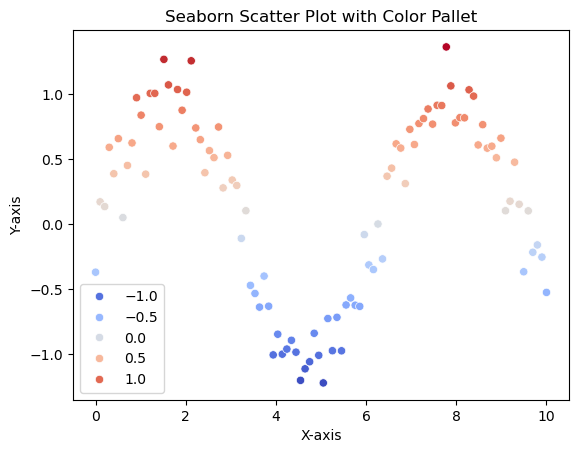

In [ ]:
# Generate some data
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + np.random.normal(0, 0.2, size=x.shape)

# Create the scatter plot
scatter = sns.scatterplot(x=x, y=y1, hue=y1, palette='coolwarm', marker='o')

# Add title and labels
plt.title('Seaborn Scatter Plot with Color Pallet')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()



### Another great part of Seaborn are the datasets! You can use the iris data set (or a bunch of others) by loading it directly. SKlearn has a function like this as well.

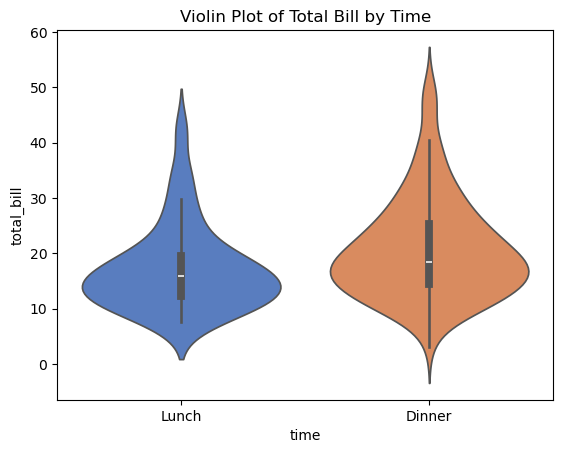

In [36]:
# Load the 'tips' dataset from Seaborn
df = sns.load_dataset("tips")

# Create violin plot to show the distribution of 'total_bill' by 'time'
sns.violinplot(x='time', y='total_bill', data=df, hue='time', palette='muted')

plt.title('Violin Plot of Total Bill by Time')
plt.show()
